In [1]:

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 7.1 MB/s  eta 0:00:01
  Created wheel for folium: file

In [2]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import itertools

In [4]:
#Wikipage with list of the neighborhoods
URL = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto'
page = requests.get(URL)

In [5]:
soup=BeautifulSoup(page.content, 'html.parser')

In [6]:
Tables= soup.findAll('table',{"class":"wikitable sortable"})

In [7]:
#Extracting the list of Neighborhoods from soup
Col=[]
Rows=Tables[0].find_all('tr')
for row in range(len(Rows)):
    column=Rows[row].find_all('td')
    try:
        if str(column[1])!="<None></None>":
            Col.append(column[1].text.split(", "))
#             Links=column[1].find_all('a')
#             for link in range(len(Links)):
#                 Col.append(Links[link].text)
    except:
        print("warning")
        


warning


In [8]:
#Cleaning the neighborhood names
Neighborhoods=list(itertools.chain.from_iterable(Col))
for elements in range(len(Neighborhoods)):
    Neighborhoods[elements]=Neighborhoods[elements].strip('\n')
    Neighborhoods[elements]=Neighborhoods[elements].strip('\t')

In [9]:
Neighborhoods

['Downtown',
 'Harbourfront',
 'Little Italy',
 'Little Portugal',
 'Dufferin Grove',
 'Palmerston',
 'University',
 'Bay Street Corridor',
 'Kensington Market',
 'Chinatown',
 'Trinity Bellwoods',
 'South Niagara',
 'Island airport',
 'The Islands',
 'waterfront communities C1',
 "Queen's Park",
 'Ontario Provincial Government',
 'Victoria Hotel',
 'Central Bay Street',
 'First Canadian Place',
 'Design Exchange',
 'Adelaide',
 'University of Toronto',
 'Union Station',
 'The Annex',
 'Yorkville',
 'South Hill',
 'Summerhill',
 'Wychwood Park',
 'Deer Park',
 'Casa Loma',
 'Forest Hill South',
 'Oakwood–Vaughan',
 'Humewood–Cedarvale',
 'Corso Italia',
 'Forest Hill Road Park',
 'Bedford Park',
 'Lawrence Manor',
 'North Toronto',
 'Forest Hill North',
 'Lawrence Park',
 'Lawrence Heights',
 'Roselawn',
 'North York',
 'Clanton Park',
 'Bathurst Manor',
 'Willowdale West',
 'Newtonbrook West',
 'Westminster–Branson',
 'Lansing-Westgate',
 'Cabbagetown',
 'St. Lawrence Market',
 'Toron

In [10]:
#Getting coordinates of the neighborhoods

In [11]:
geolocator = Nominatim(user_agent="torronto_explorer")

In [12]:
neighborhood_df= pd.DataFrame(columns=['neighborhood', 'latitude', 'longitude'])

In [13]:
for row in range(len(Neighborhoods)):
    address="Canada Toronto "+ Neighborhoods[row]
    location= geolocator.geocode(address)
    try:
        neighborhood_df=neighborhood_df.append({'neighborhood': Neighborhoods[row], 'latitude': location.latitude, 'longitude': location.longitude }, ignore_index=True)
    except:
        print('warning, could not find '+ address)
print('A total of ' + str(neighborhood_df.shape[0]/len(Neighborhoods)) + ' of all neighborhoods listed in wikipedia were found.')

warning, could not find Canada Toronto Bay Street Corridor
warning, could not find Canada Toronto waterfront communities C1
warning, could not find Canada Toronto Ontario Provincial Government
warning, could not find Canada Toronto Westminster–Branson
warning, could not find Canada Toronto Parkwoods–Donalda
warning, could not find Canada Toronto Blake-Jones
warning, could not find Canada Toronto South Central Letter Processing Plant Toronto
warning, could not find Canada Toronto Broadview North (Old East York)
warning, could not find Canada Toronto Tam O'Shanter – Sullivan
warning, could not find Canada Toronto Eglinton East (Knob Hill)
warning, could not find Canada Toronto Bendale (Cedarbrae)
warning, could not find Canada Toronto Port Union (Centennial Scarborough)
warning, could not find Canada Toronto The Junction (Junction Area)
warning, could not find Canada Toronto Rockcliffe–Smythe
warning, could not find Canada Toronto Weston-Pellam Park
warning, could not find Canada Toronto

In [14]:
#Toronto location
Toronto_center=geolocator.geocode("Toronto Canada")

In [15]:
#Map of Toronto with the location of the center of the neighborhoods
map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)
for lat, lng, label in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [16]:
neighborhood_df.append({'neighborhood':Neighborhoods[row], 'latitude':location.latitude, 'longitude':location.longitude }, ignore_index=True)

,neighborhood,latitude,longitude
0,Downtown,43.656322,-79.380916
1,Harbourfront,43.640080,-79.380150
2,Little Italy,43.655208,-79.414877
3,Little Portugal,43.647413,-79.431116
4,Dufferin Grove,43.653632,-79.426439
...,...,...,...
183,Rexdale,43.721362,-79.565513
184,Clairville,43.722563,-79.597039
185,West Humber - Clairville,43.722563,-79.597039
186,Mount Olive,43.652384,-79.383568


In [17]:
# Retrieving data from 4square

In [18]:
# The code was removed by Watson Studio for sharing.

In [19]:
#Retrieving neighborhood name, category and geo position of the venues
All_venues=pd.DataFrame(columns=['neighborhood','name','categories','lat','lng']);
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
for row in neighborhood_df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row[1]['latitude'], 
    row[1]['longitude'], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['neighborhood']=row[1]['neighborhood']
        All_venues=pd.concat([All_venues,venues_filt])
All_venues.reset_index(inplace=True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [20]:
All_venues

,index,neighborhood,name,categories,lat,lng
0,0,Downtown,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,1,Downtown,Blaze Pizza,Pizza Place,43.656518,-79.380015
2,2,Downtown,Silver Snail Comics,Comic Shop,43.657031,-79.381403
3,3,Downtown,Burrito Boyz,Burrito Place,43.656265,-79.378343
4,4,Downtown,Yonge-Dundas Square,Plaza,43.656054,-79.380495
...,...,...,...,...,...,...
4045,25,Mount Olive,Tachi,Sushi Restaurant,43.650596,-79.383396
4046,26,Mount Olive,GoodLife Fitness Toronto 137 Yonge Street,Gym,43.651242,-79.378068
4047,27,Mount Olive,Ninki Izakaya,Japanese Restaurant,43.650228,-79.384863
4048,28,Mount Olive,Rolltation,Japanese Restaurant,43.654918,-79.387424


In [21]:
#Grouping venues by neighborhoods
All_venues.groupby(['neighborhood']).count()

,index,name,categories,lat,lng
neighborhood,,,,,
Adelaide,30,30,30,30,30
Agincourt,19,19,19,19,19
Alderwood,14,14,14,14,14
Baby Point,16,16,16,16,16
Banbury,1,1,1,1,1
...,...,...,...,...,...
York Mills West,18,18,18,18,18
York University,26,26,26,26,26
York University Heights,14,14,14,14,14


In [22]:
#Binary category of venues/ Preparation for clustering
category_bin=pd.get_dummies(All_venues['categories'])

In [23]:
category_bin['neighborhood']=All_venues['neighborhood']
category_bin=category_bin[['neighborhood'] + list(category_bin.columns[:-1])]
category_bin

,neighborhood,ATM,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4046,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4047,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4048,Mount Olive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Frequency of venue types per neighborhood
frequency_neigh=category_bin.groupby('neighborhood').mean()

In [25]:
frequency_neigh

,ATM,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
neighborhood,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.105263,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Baby Point,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062500,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Banbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
York University Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [26]:
#top 5 most frequent venue categories per neighborhood
top5=pd.DataFrame(columns=['neighborhood', '1', '2', '3', '4', '5'])
for row in frequency_neigh.iterrows():
    List=row[1].sort_values(ascending=False)
    try:
        top5=top5.append({'neighborhood':row[0], '1':List.index[1], '2':List.index[2],'3':List.index[3],'4':List.index[4],'5':List.index[5]}, ignore_index=True)
    except:
        pass
top5

,neighborhood,1,2,3,4,5
0,Adelaide,Restaurant,Coffee Shop,Gym,Theater,Art Gallery
1,Agincourt,Asian Restaurant,Vietnamese Restaurant,Pizza Place,Korean Restaurant,Karaoke Bar
2,Alderwood,Convenience Store,Gym,Pharmacy,Pub,Coffee Shop
3,Baby Point,Metro Station,Italian Restaurant,Coffee Shop,River,Café
4,Banbury,Zoo Exhibit,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...
180,York Mills West,Restaurant,Gym,Sandwich Place,Golf Course,Pub
181,York University,Bus Station,Pub,Pharmacy,Athletics & Sports,Middle Eastern Restaurant
182,York University Heights,Pizza Place,Bus Stop,Bar,Shopping Mall,Grocery Store
183,Yorkdale,Furniture / Home Store,Restaurant,Bookstore,Toy / Game Store,Men's Store


In [27]:
# K-means Clustering!

In [28]:
from sklearn.cluster import KMeans
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [29]:
#Selecting the number of clusters of the Kmeans by analysing the mean distance between the elements of a cluster and its centroid
temp=[];
temp2=[];
for ncluster in range(2,20):
    try:
        frequency_neigh=frequency_neigh.drop('labels',1)
    except:
        pass
    kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(frequency_neigh)
    frequency_neigh['labels']=kmeans.labels_
    for row in frequency_neigh.iterrows():
        temp.append((sum((kmeans.cluster_centers_[int(row[1]['labels'])]- row[1][:-1])**2)))
    temp2.append(sum(temp)/len(temp))

Text(0, 0.5, 'Mean squared error')

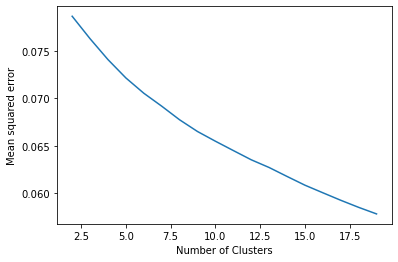

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),temp2)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean squared error')

In [31]:
#I guess the knee is around 5 clusters... So thats the number I chose.
ncluster=5
cluster_df=frequency_neigh.drop('labels',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
frequency_neigh['labels']=kmeans.labels_

In [32]:
# set color scheme for the clusters
x = np.arange(ncluster)
ys = [i + x + (i*x)**2 for i in range(ncluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood_df['latitude'], neighborhood_df['longitude'], neighborhood_df['neighborhood'],frequency_neigh['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto


In [33]:
top5['labels']=kmeans.labels_

In [34]:
#Displaying neighborhoods of cluster 0 and the top 5 categories for each neighborhood
top5[top5['labels']==0]

,neighborhood,1,2,3,4,5,labels
1,Agincourt,Asian Restaurant,Vietnamese Restaurant,Pizza Place,Korean Restaurant,Karaoke Bar,0
2,Alderwood,Convenience Store,Gym,Pharmacy,Pub,Coffee Shop,0
9,Beechborough,Fast Food Restaurant,Sandwich Place,Grocery Store,Italian Restaurant,Restaurant,0
17,Cedarbrae,Coffee Shop,Pizza Place,Grocery Store,Liquor Store,Big Box Store,0
23,Clairlea,Grocery Store,Pizza Place,Convenience Store,Pharmacy,Fast Food Restaurant,0
24,Clairville,Department Store,Paper / Office Supplies Store,Bank,Gas Station,Electronics Store,0
26,Clarks Corners,Pharmacy,Convenience Store,Park,Caribbean Restaurant,Shopping Mall,0
27,Cliffcrest,Ice Cream Shop,Pizza Place,Park,Sandwich Place,Gift Shop,0
31,Crescent Town,Convenience Store,Coffee Shop,Pharmacy,Shopping Mall,Food & Drink Shop,0
41,Dorset Park,Electronics Store,Asian Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,0


In [35]:
#Displaying neighborhoods of cluster 1 and the top 5 categories for each neighborhood
top5[top5['labels']==1]

,neighborhood,1,2,3,4,5,labels
0,Adelaide,Restaurant,Coffee Shop,Gym,Theater,Art Gallery,1
5,Bathurst Manor,Park,Convenience Store,Men's Store,Health & Beauty Service,Trail,1
6,Bayview Village,Chinese Restaurant,Bank,Café,Thai Restaurant,Liquor Store,1
8,Bedford Park,Pharmacy,Pub,Pizza Place,Restaurant,Thai Restaurant,1
10,Berczy Park,Cocktail Bar,Restaurant,Farmers Market,Museum,Thai Restaurant,1
...,...,...,...,...,...,...,...
160,University,Restaurant,Park,Japanese Restaurant,Theater,College Gym,1
161,University of Toronto,Restaurant,Park,Japanese Restaurant,Theater,College Gym,1
177,Wychwood Park,Café,Thai Restaurant,Indian Restaurant,Restaurant,Tea Room,1
183,Yorkdale,Furniture / Home Store,Restaurant,Bookstore,Toy / Game Store,Men's Store,1


In [36]:
#Displaying neighborhoods of cluster 2 and the top 5 categories for each neighborhood
top5[top5['labels']==2]

,neighborhood,1,2,3,4,5,labels
14,Bridle Path,Dry Cleaner,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,2


In [37]:
#Displaying neighborhoods of cluster 3 and the top 5 categories for each neighborhood
top5[top5['labels']==3]

,neighborhood,1,2,3,4,5,labels
3,Baby Point,Metro Station,Italian Restaurant,Coffee Shop,River,Café,3
21,Christie,Coffee Shop,Grocery Store,Cocktail Bar,Dessert Shop,Indian Restaurant,3
28,Cliffside,Coffee Shop,Grocery Store,Sandwich Place,Pub,Sushi Restaurant,3
30,Coxwell,Gastropub,Café,Ethiopian Restaurant,American Restaurant,Bar,3
39,Don Mills,Clothing Store,Fast Food Restaurant,Bank,Japanese Restaurant,Asian Restaurant,3
40,Don Valley Village,Pizza Place,Sandwich Place,Park,Bank,Gas Station,3
43,Downsview,Bus Station,Middle Eastern Restaurant,Gas Station,Playground,Recreation Center,3
47,East York,Plaza,Sandwich Place,Liquor Store,Restaurant,Intersection,3
48,Eglinton West,Grocery Store,Caribbean Restaurant,Coffee Shop,Middle Eastern Restaurant,Convenience Store,3
51,Flemingdon Park,Coffee Shop,Middle Eastern Restaurant,Science Museum,Gym,Sandwich Place,3


In [38]:
#Displaying neighborhoods of cluster 0 and the top 4 categories for each neighborhood
top5[top5['labels']==4]

,neighborhood,1,2,3,4,5,labels
4,Banbury,Zoo Exhibit,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,4
7,Bayview Woods-Steeles,Sandwich Place,Bank,Zoo Exhibit,Dry Cleaner,Eastern European Restaurant,4
25,Clanton Park,Home Service,Health & Beauty Service,Event Space,Dumpling Restaurant,Eastern European Restaurant,4
78,Lansing-Westgate,Dog Run,Spa,Zoo Exhibit,Event Space,Eastern European Restaurant,4
